# Generating, Viewing, and Exporting Experimental Switch Sequences

We use the `Configure Switch Sequence` VI in LabVIEW to create instructions for performing experiments. This program is a LabVIEW GUI interface for a program written in python that is called via the command line from LabVIEW. This program is based on the `Switch` and `Sequence` objects in the `switches.py` file. The `Switch` object contains instructions for creating experimental sequences for a single experimental parameter, and a Sequence object aggregates instructions for multiple `Switch` objects to create full experiment sequences.

In this document, I will show you have to access, create, and export experimental switch sequences using the python code that I have written. First, lets import the `DatabaseAccess` class so that we can import archived experimental switch sequence instructions, and lets import the `Switch` and `Sequence` classes as previously described.

In [1]:
import sys
sys.path.insert(0, './code')
sys.path.insert(0, '../DatabaseAccess/code')

from switches import Switch, Sequence
from database_access import DatabaseAccess

%matplotlib inline
import pandas as pd

### Importing Experiment Sequence Instructions from the Database

First open a connection to our SQL databases:

In [2]:
db = DatabaseAccess()

please enter the database password: ········
LoggingConfigSQL connection open
LoggingLogData connection open
master connection open


Using the `switch_configurations` method, we can look at the list of switch configurations that have been stored:

In [3]:
db.switch_configurations().head()

ConfigurationCode  \
SwitchConfigName                  SwitchConfigID                                                      
                                  3               Switches=[Switch("N",],timescale=0,degeneracy=...   
                                  4               Switches=[Switch("N",["-1","+1"],timescale=0,d...   
Deterministic NEQB Block Sequence 5               Switches=[Switch("N",["-1","+1"],timescale=0,d...   
                                  6               Switches=[Switch("N",[Switch("N",["-1","+1"],t...   
Gen I Superblock Sequence         7               Switches=[Switch("N",[Switch("N",["-1","+1"],t...   

                                                                            SwitchConfigDescription  \
SwitchConfigName                  SwitchConfigID                                                      
                                  3                                                                   
                                  4                                                                   
Deterministic NEQB Block Sequence 5               This is a 4x degenerate, deterministic block s...   
                                  6                                                                   
Gen I Superblock Sequence         7               Each NEQB block is deterministic, but the star...   

                                                               TimeStamp  
SwitchConfigName                  SwitchConfigID                          
                                  3              2015-09-21 15:45:39.737  
                                  4              2015-09-21 15:46:08.623  
Deterministic NEQB Block Sequence 5              2015-09-21 15:47:54.167  
                                  6              2015-09-21 15:59:33.830  
Gen I Superblock Sequence         7              2015-09-21 16:02:00.403

We can then obtain a `sequence` object corresponding to a certain `SwitchConfigName`, or corresponding to a given `SwitchConfigID`, and plot a sample switch configuration waveform. Note that only the instructions to create experimental sequences is archived in the database, not the actually used experimental sequences. When the `Sequence` object is created, it automatically creates an instance of an experimental sequence consistent with the instructions and stores that as a `SequenceInstance` object in the `current_sequence` field of the `Sequence` object.

Here we read in instructions for a detuning scan, create a sequence, and plot the block and superblock structure, showing the block with index 15.

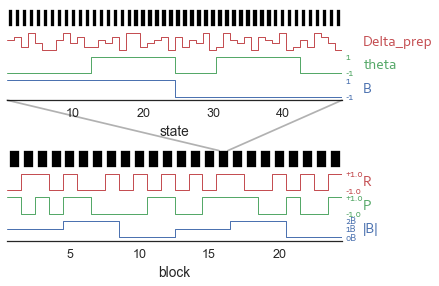

In [4]:
experiment = db.get_switch_configuration('Example Readout Detuning Scan Sequence')
experiment.plot(block=15)

Close the database connection when you are done with it.

In [24]:
db.close()

database connection closed


### Saving Experimental Switch Sequences

Here is a table including all of the state indices, the switch names, and the switch values for each state:

In [8]:
experiment.current_sequence.table

,,,B,Delta_prep,P,R,theta,|B|
trace,state,block,,,,,,
0,0,0,-1,0.9,1,-1,1,1B
1,1,0,-1,1.5,1,-1,1,1B
2,2,0,-1,-1.5,1,-1,1,1B
3,3,0,-1,0.3,1,-1,1,1B
4,4,0,-1,-0.9,1,-1,1,1B
5,5,0,-1,-0.3,1,-1,1,1B
6,6,0,-1,-1.5,1,-1,-1,1B
7,7,0,-1,0.9,1,-1,-1,1B
8,8,0,-1,-0.3,1,-1,-1,1B


This can be saved to CSV using usual `pandas.DataFrame` methods, such as `to_csv`.

In [20]:
filename = 'example_detuning_scan.csv'
experiment.current_sequence.table.to_csv(filename, sep='\t')

Note that this same behavior could be attained by calling:

`experiment.current_sequence.save(filename)`

We can see the formatting of this file by openning the file directly and reading the first several lines:

In [22]:
with open(filename, 'rb') as f:
    for i in range(15):
        print(f.readline()[:-1])
    print('...')

trace	state	block	B	Delta_prep	P	R	theta	|B|
0	0	0	-1	0.9	1.0	-1.0	1	1B
1	1	0	-1	1.5	1.0	-1.0	1	1B
2	2	0	-1	-1.5	1.0	-1.0	1	1B
3	3	0	-1	0.3	1.0	-1.0	1	1B
4	4	0	-1	-0.9	1.0	-1.0	1	1B
5	5	0	-1	-0.3	1.0	-1.0	1	1B
6	6	0	-1	-1.5	1.0	-1.0	-1	1B
7	7	0	-1	0.9	1.0	-1.0	-1	1B
8	8	0	-1	-0.3	1.0	-1.0	-1	1B
9	9	0	-1	1.5	1.0	-1.0	-1	1B
10	10	0	-1	-0.9	1.0	-1.0	-1	1B
11	11	0	-1	0.3	1.0	-1.0	-1	1B
12	12	0	-1	-0.9	1.0	-1.0	1	1B
13	13	0	-1	-1.5	1.0	-1.0	1	1B
...


### Direct Creation of Experiment Sequences

Alternatively, we can directly construct a switch configuration object.

For additional information regarding method used to specify experimental instructions, please see the documentation for the [Configure Switch Sequence VI](http://www.doylegroup.harvard.edu/wiki/index.php/Internal:ThO:Software), or see the documentation for the `Switch` and `Sequence` objects:

In [31]:
print(Switch.__doc__[:750] + ' ... ')

 This class encapsulates information about a given experimental switch. 
	Switches have the following properties:
	
	Attributes:
	
	Obligatory Inputs:
	name=this is text field to give a name to the switch to carry throughout.
	
	states=this is a list (of objects. The objects can be integers, strings, lists,
						   for superblock switches, these will be lists of Switch objects
						   which must have the same name as this switch)
	  
	Optional Inputs:					 
	timescale=this is an integer (default 0)- this indicates the time slot alloted for this switch.
			  Later, when we form an experiment sequence, for truely unique experiment states,
			  each timescale must be unique. Smaller integers for timescale correspond to faster
			  switches.  ... 


Here is a set of instructions that nearly replicates the Gen I uberblock sequence. Note that this code looks complicated, but can be generated in a nicer way by using nesting functions, or by having the Configure Switch Sequence GUI automatically generate this code from your instructions.

In [5]:
Switches=[Switch("N",
                 [Switch("N",
                        [Switch("N",
                                ["-1","+1"],
                                timescale=0,degeneracy=1,configuration="AB",force_unique=True),
                         Switch("N",
                                ["-1","+1"],
                                timescale=0,degeneracy=1,configuration="BA",force_unique=True)],
                        timescale=0,degeneracy=1,configuration=["random sequence",[[0],[1]]],force_unique=False)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("E",
                 [Switch("E",
                         [Switch("E",
                                 ["-1","+1"],
                                 timescale=1,degeneracy=1,configuration="ABBA",force_unique=True),
                          Switch("E",
                                 ["-1","+1"],
                                 timescale=1,degeneracy=1,configuration="BAAB",force_unique=True)],
                         timescale=0,degeneracy=1,configuration=["random sequence",[[0],[1]]],force_unique=False)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("theta",
                 [Switch("theta",
                         [Switch("theta",
                                 ["-1","+1"],
                                 timescale=2,degeneracy=1,configuration="ABBA",force_unique=True),
                          Switch("theta",
                                 ["-1","+1"],
                                 timescale=2,degeneracy=1,configuration="BAAB",force_unique=True)],
                         timescale=0,degeneracy=1,configuration=["random sequence",[[0],[1]]],force_unique=False)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("B",
                 [Switch("B",
                         [Switch("B",
                                 ["-1","+1"],
                                 timescale=3,degeneracy=1,configuration="AB",force_unique=True),
                          Switch("B",
                                 ["-1","+1"],
                                 timescale=3,degeneracy=1,configuration="BA",force_unique=True)],
                         timescale=0,degeneracy=1,configuration="sequence",force_unique=False)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("P",
                 [Switch("P",
                             ["-1","+1"],
                             timescale=0,degeneracy=1,configuration=["random permutation",[0,0,1,1]],force_unique=True)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("L",
                 [Switch("L",
                        ["-1","+1"],
                        timescale=1,degeneracy=1,configuration="sequence",force_unique=True)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("R",
                 [Switch("R",
                        ["-1","+1"],
                        timescale=2,degeneracy=1,configuration="sequence",force_unique=True)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("G",
                 [Switch("G",
                        ["-1","+1"],
                        timescale=3,degeneracy=1,configuration="sequence",force_unique=True)],
                 timescale=0,degeneracy=1,configuration="sequence",force_unique=False),
          Switch("|B|",
                 ["0B","1B","2B"],
                 timescale=0,degeneracy=1,configuration=["sequence",[1,1,0,2]],force_unique=True),
          Switch("|E|",
                 ["low","high"],
                 timescale=1,degeneracy=3,configuration="sequence",force_unique=True),
          Switch("k.z",
                 ["-1","+1"],
                 timescale=2,degeneracy=1,configuration="BA",force_unique=True)]

Similarly, we can generate a sample sequence of states, and plot them. Note that since there are many switches, and hence many experimental states for this configuration, the creation takes a while. Note that since we have a larger nested structure, we can now specify the particular block and superblock index to plot.

In [6]:
%time s = Sequence(Switches)

Wall time: 39.1 s


Wall time: 597 ms


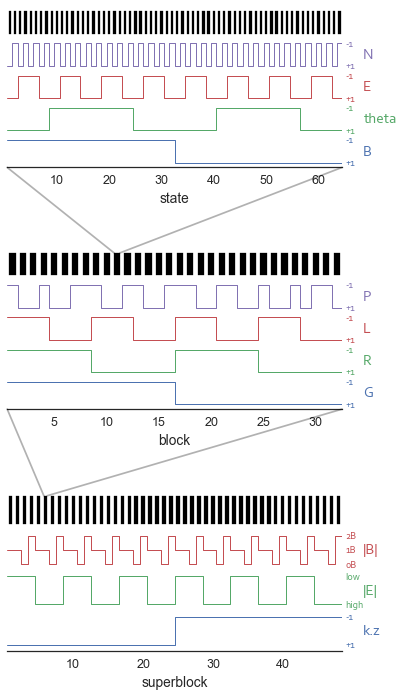

In [7]:
%time s.plot(block=[10, 5])

So thats about it. Please check the documentation or contact Brendon for additional information.